# Mendefinisikan Library



```
Meng-install library art untuk memberikan bentuk print out khusus
```



In [1]:
!pip install art

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.4/599.4 kB 35.2 MB/s eta 0:00:00




```
Dependencies:

*   numpy : Library untuk melakukan operasi matematikan dan manipulasi array
*   matplotlib : Visualisasi data
*   pandas : Data manipulasi dan analisis
*   seaborn : Visualisasi data
*   art : Mencetak ASCII art
*   IPython.display : Menampilkan data grafik dan tabel di IPython Environments
*   sklearn : Melakukan operasi dan algoritma untuk Predictive Analytics
*   warnings : Modul untuk mengatasi warning


```



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from art import *
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table
data_table.enable_dataframe_formatter()



```
Class Config merupakan Class yang berisikan data variabel untuk mengatur parameter yang digunakan pada serangkaian proses Predictive Analytics
```



In [3]:
class Config:

  """
  Class yang digunakan untuk mengatur konfigurasi dan parameter

  ...

  Attributes
  ----------
  url : str
      Path atau URL dataset
  models : dict
      Dictionary dari inisialisasi model - model untuk mempelajari data
  """

  url = "https://gitlab.com/yunus.bayu.aji/house-price-dataset/-/raw/main/laptopPrice.csv"

  models = {
      "KNN": KNeighborsRegressor(n_neighbors=15),
      "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1605, n_jobs=-1),
      "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=7, learning_rate=1e-3),
      "GradienBoost": GradientBoostingRegressor(n_estimators=100, learning_rate = 1e-3, random_state = 7),
      "SVM": SVR(C=1.0, epsilon=0.2)

  }



```
Class yang berisikan fungsi - fungsi untuk menjalankan Predictive Analytics

Attributes
----------
url : str
    Path atau URL dataset

Methods
-------
get_data(self, data, index_state = False)
    Menampilkan keseluruhan data

get_data_shape(self, data)
    Menampilkan ukuran data

get_data_info(self, data)
    Menampilkan informasi data

get_data_describe(self, data)
    Menampilkan deskripsi data

get_data_head(self, data)
    Menampilkan 5 baris pertama data

get_nan_value(self, data)
    Menampilkan jumlah NaN data

get_num_duplicate(self, data)
    Menampilkan jumlah data terduplikasi

variable_description(self)
    Menampilkan keseluruhan deskprisi variabel (ukuran data, informasi data, deskripsi data, head data, NaN data, dan Duplikasi data)

missing_value_handling(self)
    Melakukan operasi untuk menghilangkan duplikasi data dan mengatasi Outlier

univariate_analysis(self)
    Menampilkan grafik dan persentase data dari Data Numerik dan Data Kategorik sehingga dapat dilakukan analisis

missing_value_handling(self)
    Menampilkan grafik dari beberapa data yang saling berkorelasi untuk dilakukan analisis seperti Barplot, Pairplot, Heatmap, dan melakukan Eliminasi data

data_preparation(self)
    Melakukan encoding data kategorikal dan membagi data menjadi data train dan test

train(self, models: dict)
    Melakukan Training dan Testing data menggunakan beberapa algoritma untuk mempelajari pola data

train(self, models: dict)
    Melakukan evaluasi data
```



In [4]:
class Predictive_Analytics:

  def __init__(self, url):
    tprint("1. Data Loading")
    print("Read Data From ", url)

    self.data = pd.read_csv(url)

    print()

  def get_data(self, data, index_state = False):
    print("House Price Data")
    display(data_table.DataTable(data, include_index = index_state, num_rows_per_page=10))
    print()
    return data

  def get_data_shape(self, data):
    print("Data Shape")
    print(data.shape)
    print()
    return data.shape

  def get_data_info(self, data):
    print("Data Info")
    # display(data_table.DataTable(data.info(), include_index=False, num_rows_per_page=10))
    print()
    return data.info()

  def get_data_describe(self, data):
    print("Data Describe")
    display(data_table.DataTable(data.describe(), include_index=True, num_rows_per_page=10))
    print()
    return data.describe()

  def get_data_head(self, data):
    print("Data Head")
    display(data_table.DataTable(data.head(), include_index=False, num_rows_per_page=10))
    print()
    return data.head()

  def get_nan_value(self, data):
    print("Check NaN Value")
    display(self.data.isna().sum())
    print()

  def get_num_duplicate(self, data):
    print("Number of Duplicated Data")
    print(self.data.duplicated().sum())
    print()

  def variable_description(self):
    tprint("2. EDA - Deskripsi Variabel")
    self.get_data(self.data)
    self.get_data_head(self.data)
    self.get_data_info(self.data)
    self.get_data_describe(self.data)
    self.get_data_shape(self.data)
    self.get_nan_value(self.data)
    self.get_num_duplicate(self.data)
    print()

  def missing_value_handling(self):
    tprint("3. EDA - Menangani Missing Value")

    print("Drop Duplicate Data")
    print()
    self.data.drop_duplicates()

    print("Handling Outlier")

    self.Q1 = self.data.quantile(0.25)
    self.Q3 = self.data.quantile(0.75)
    self.IQR = self.Q3-self.Q1
    self.data = self.data[~((self.data<(self.Q1-1.5*self.IQR))|(self.data>(self.Q3+1.5*self.IQR))).any(axis=1)]

    self.get_data_shape(self.data)
    self.get_data_describe(self.data)

  def univariate_analysis(self):
    tprint("4. EDA - Univariate Analysis")
    self.numeric_features = self.data.select_dtypes(exclude='object').columns.to_list()
    self.categoric_features = self.data.select_dtypes(include='object').columns.to_list()
    print("Numerical Features : ", self.numeric_features)
    print("Categorical Features : ", self.categoric_features)
    print()

    print("Categorical Feature Graph")
    print()
    for i,x in enumerate(self.categoric_features):
      self.feature = self.categoric_features[i]
      self.count = self.data[self.feature].value_counts()
      self.percent = 100*self.data[self.feature].value_counts(normalize=True)
      self.df = pd.DataFrame({'Number of Sample':self.count, 'Percentage':self.percent.round(1)})
      print(self.df)
      display(self.count.plot(kind='bar', title=self.feature))
      plt.show()

    print("Numerical Feature Graph")
    print()
    display(self.data.hist(bins=100, figsize=(20,5)))
    plt.show()

  def multivariate_analysis(self):
    tprint("5. EDA - Multivariate Analysis")
    print()

    print("Barplot Analysis")

    self.categoric_features = self.data.select_dtypes(include='object').columns.to_list()
    for i,x in enumerate(self.categoric_features):
      self.group_data = self.data.groupby(x)
      self.ax = sns.barplot(x = self.group_data["Price"].mean().index,
                  y = self.group_data["Price"].mean().values,
                  palette = "summer")
      for wo in self.ax.containers:
        self.ax.bar_label(wo, color='green', size=10)
      plt.title("Average 'Price' Relative to {}".format(x))
      plt.xlabel(x)
      plt.ylabel("Price")
      plt.show()

    print("Pairplot Analysis")

    sns.pairplot(self.data, diag_kind = 'kde')

    print("Heatmap Correlation")
    plt.figure(figsize=(10, 8))
    self.correlation_matrix = self.data.corr().round(2)

    self.cmap = sns.color_palette("rocket_r", as_cmap=True)
    sns.heatmap(data=self.correlation_matrix, annot=True, cmap=self.cmap)
    plt.title("Matrix Correlation of Numeric Features", size=20)

    print("Eliminating Small Correlation Data")

    self.eliminate_data = self.correlation_matrix["Price"][~(self.data.corr()["Price"]>0.50) | (self.data.corr()["Price"]<-0.50)].index.to_list()
    for x in self.eliminate_data:
      self.data.drop([x], inplace=True, axis=1)
    self.get_data_info(self.data)

  def data_preparation(self):
    tprint("6. Data Preparation")

    print("Encoding Categorical Data : ")
    self.categoric_features = self.data.select_dtypes(include='object').columns.to_list()
    print(self.categoric_features)
    print()
    for x in self.categoric_features:
      self.data = pd.concat([self.data, pd.get_dummies(self.data[x], prefix=x)],axis=1)
    self.data.drop(self.categoric_features, axis=1, inplace=True)
    self.get_data_info(self.data)
    self.get_data_head(self.data)

    self.X = self.data.drop(["Price"],axis =1)
    self.Y = self.data["Price"]
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X,
                                                                            self.Y,
                                                                            test_size = 0.2,
                                                                            random_state = 1609)

    print("Total Dataset Input  : ", len(self.X))
    print("Total Dataset Output : ", len(self.Y))
    print("Total Train Data     : ", self.x_train.shape)
    print("Total Test Data      : ", self.x_test.shape)

  def train(self, models: dict):
    tprint("7. Training Data")

    k_folds = KFold(n_splits= 7)
    self.results = {f"{n}":None for n,m in models.items()}
    self.results2 = self.results.copy()
    for name, model in models.items():
      print("Train model using ", name)
      model.fit(self.x_train, self.y_train)
      self.results[name] = np.mean(np.sqrt(-cross_val_score(model,
                                                       self.x_train,
                                                       self.y_train,
                                                       scoring = 'neg_mean_squared_error',
                                                       cv= k_folds)))
      self.results2[name] = np.mean(np.sqrt(-cross_val_score(model,
                                                       self.x_test,
                                                       self.y_test,
                                                       scoring = 'neg_mean_squared_error',
                                                       cv= k_folds)))
    self.results = pd.DataFrame(self.results, index=["RMSE Train"]).T
    self.results = pd.concat([self.results, pd.DataFrame(self.results2, index=["RMSE Test"]).T], axis=1)
    self.results = self.results.sort_values(by="RMSE Train", ascending=True)
    self.get_data(self.results, index_state = True)

  def evaluate(self, models: dict):
    tprint("8. Evaluation")

    self.index = 1

    self.test_input = self.x_test.iloc[self.index].values.reshape(1, -1)
    print("y true : ", self.y_test.iloc[self.index])
    for name, model in models.items():
        print(f"Prediksi {name} : ", model.predict(self.test_input).round(2)[0])

conf = Config()

# data = pd.read_csv(conf.url)
# data.info()
# data_table.DataTable(data, include_index=False, num_rows_per_page=10)
pa = Predictive_Analytics(url = conf.url)

 _      ____          _            _                        _  _               
/ |    |  _ \   __ _ | |_   __ _  | |      ___    __ _   __| |(_) _ __    __ _ 
| |    | | | | / _` || __| / _` | | |     / _ \  / _` | / _` || || '_ \  / _` |
| | _  | |_| || (_| || |_ | (_| | | |___ | (_) || (_| || (_| || || | | || (_| |
|_|(_) |____/  \__,_| \__| \__,_| |_____| \___/  \__,_| \__,_||_||_| |_| \__, |
                                                                         |___/ 

Read Data From  https://gitlab.com/yunus.bayu.aji/house-price-dataset/-/raw/main/laptopPrice.csv





```
Dari Deskripsi Variabel, dapat ditarik beberapa kesimpulan
  a. Data terdiri dari 18 fitur data dan 1 output yaitu "Price"
  b. Data terdiri dari 2 tipe data utama yaitu object (kategorikal) dan int64 (numerikal)
  c. Tidak terdapat NaN value
  d. Terdapat 21 duplikasi data
  e. Terdapat Outlier  
```



In [5]:
pa.variable_description()

 ____       _____  ____      _              ____              _           _              _  __     __              _         _            _ 
|___ \     | ____||  _ \    / \            |  _ \   ___  ___ | | __ _ __ (_) _ __   ___ (_) \ \   / /  __ _  _ __ (_)  __ _ | |__    ___ | |
  __) |    |  _|  | | | |  / _ \    _____  | | | | / _ \/ __|| |/ /| '__|| || '_ \ / __|| |  \ \ / /  / _` || '__|| | / _` || '_ \  / _ \| |
 / __/  _  | |___ | |_| | / ___ \  |_____| | |_| ||  __/\__ \|   < | |   | || |_) |\__ \| |   \ V /  | (_| || |   | || (_| || |_) ||  __/| |
|_____|(_) |_____||____/ /_/   \_\         |____/  \___||___/|_|\_\|_|   |_|| .__/ |___/|_|    \_/    \__,_||_|   |_| \__,_||_.__/  \___||_|
                                                                            |_|                                                             

House Price Data



Data Head



Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null 


Data Shape
(823, 19)

Check NaN Value


brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


Number of Duplicated Data
21






```
Program missing_value_handling menghilangkan duplikasi data dan outlier sehingga data menjadi berjumlah 634 data
```



In [6]:
pa.missing_value_handling()

 _____      _____  ____      _              __  __                                                  _   __  __  _            _                __     __        _              
|___ /     | ____||  _ \    / \            |  \/  |  ___  _ __    __ _  _ __    __ _   __ _  _ __  (_) |  \/  |(_) ___  ___ (_) _ __    __ _  \ \   / /  __ _ | | _   _   ___ 
  |_ \     |  _|  | | | |  / _ \    _____  | |\/| | / _ \| '_ \  / _` || '_ \  / _` | / _` || '_ \ | | | |\/| || |/ __|/ __|| || '_ \  / _` |  \ \ / /  / _` || || | | | / _ \
 ___) | _  | |___ | |_| | / ___ \  |_____| | |  | ||  __/| | | || (_| || | | || (_| || (_| || | | || | | |  | || |\__ \\__ \| || | | || (_| |   \ V /  | (_| || || |_| ||  __/
|____/ (_) |_____||____/ /_/   \_\         |_|  |_| \___||_| |_| \__,_||_| |_| \__, | \__,_||_| |_||_| |_|  |_||_||___/|___/|_||_| |_| \__, |    \_/    \__,_||_| \__,_| \___|
                                                                               |___/                                         



```
Dari Univariate Analysis dapat ditarik kesimpulan bahwa "Number of Ratings"
dan "Numer of Reviews" tidak begitu mempengaruhi harga, hal ini dapat dilihat
dari perubahan grafik yang cenderung menurun tetapi "Price" cenderung fluktuatif
```



 _  _        _____  ____      _              _   _         _                      _         _              _                   _              _      
| || |      | ____||  _ \    / \            | | | | _ __  (_)__   __  __ _  _ __ (_)  __ _ | |_   ___     / \    _ __    __ _ | | _   _  ___ (_) ___ 
| || |_     |  _|  | | | |  / _ \    _____  | | | || '_ \ | |\ \ / / / _` || '__|| | / _` || __| / _ \   / _ \  | '_ \  / _` || || | | |/ __|| |/ __|
|__   _| _  | |___ | |_| | / ___ \  |_____| | |_| || | | || | \ V / | (_| || |   | || (_| || |_ |  __/  / ___ \ | | | || (_| || || |_| |\__ \| |\__ \
   |_|  (_) |_____||____/ /_/   \_\          \___/ |_| |_||_|  \_/   \__,_||_|   |_| \__,_| \__| \___| /_/   \_\|_| |_| \__,_||_| \__, ||___/|_||___/
                                                                                                                                  |___/              

Numerical Features :  ['Price', 'Number of Ratings', 'Number of Reviews']
Categorical Features :  [

<Axes: title={'center': 'brand'}>

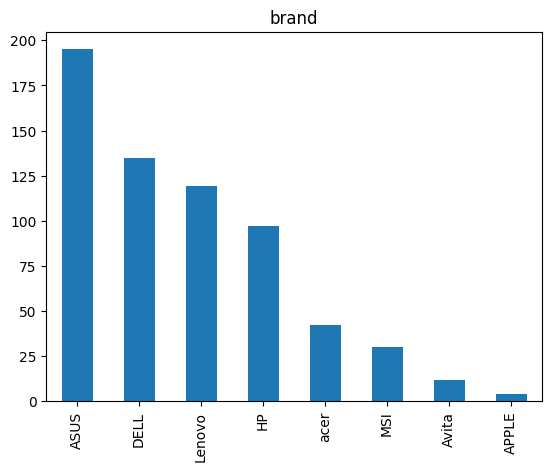

       Number of Sample  Percentage
Intel               478        75.4
AMD                 152        24.0
M1                    4         0.6


<Axes: title={'center': 'processor_brand'}>

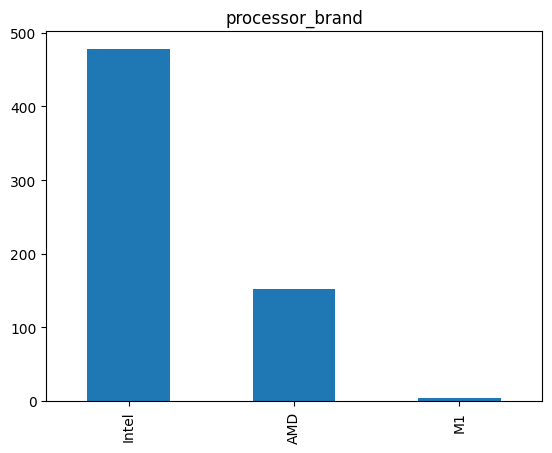

              Number of Sample  Percentage
Core i5                    249        39.3
Core i3                    124        19.6
Core i7                     78        12.3
Ryzen 5                     61         9.6
Ryzen 7                     51         8.0
Ryzen 9                     22         3.5
Ryzen 3                     19         3.0
Celeron Dual                14         2.2
Pentium Quad                10         1.6
M1                           4         0.6
Core i9                      2         0.3


<Axes: title={'center': 'processor_name'}>

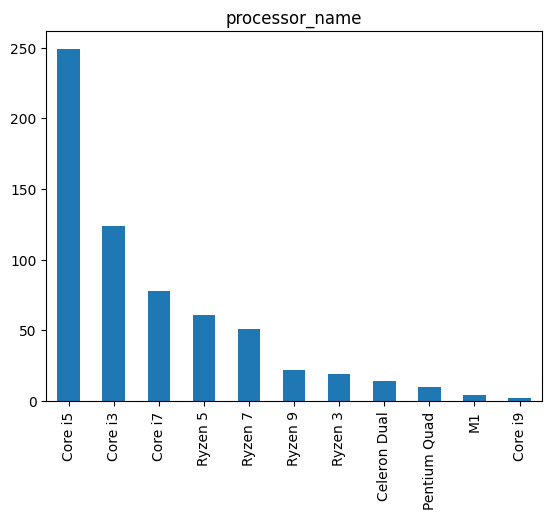

               Number of Sample  Percentage
11th                        293        46.2
Not Available               177        27.9
10th                        114        18.0
8th                          37         5.8
7th                           9         1.4
9th                           2         0.3
4th                           1         0.2
12th                          1         0.2


<Axes: title={'center': 'processor_gnrtn'}>

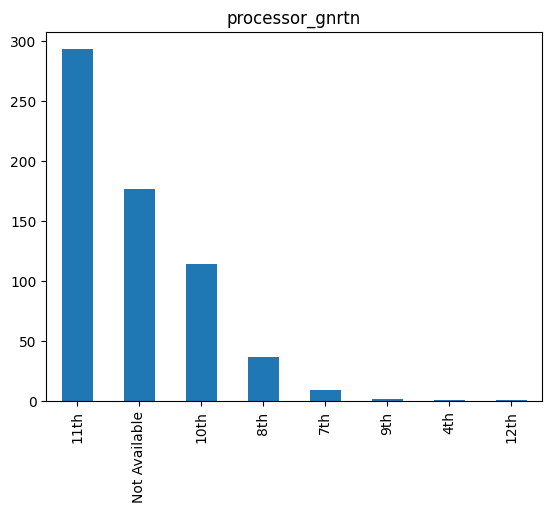

       Number of Sample  Percentage
8 GB                335        52.8
4 GB                174        27.4
16 GB               125        19.7


<Axes: title={'center': 'ram_gb'}>

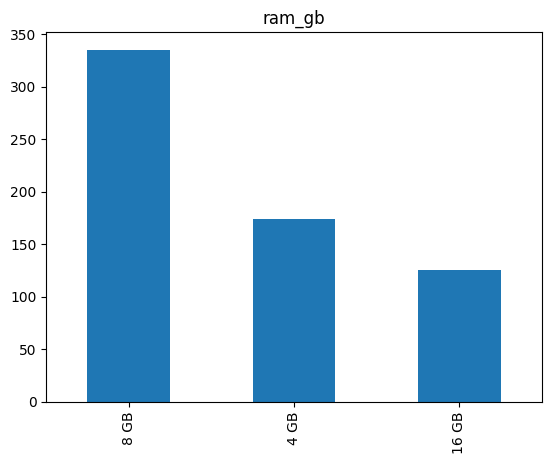

         Number of Sample  Percentage
DDR4                  549        86.6
LPDDR4X                53         8.4
LPDDR4                 13         2.1
LPDDR3                  8         1.3
DDR3                    6         0.9
DDR5                    5         0.8


<Axes: title={'center': 'ram_type'}>

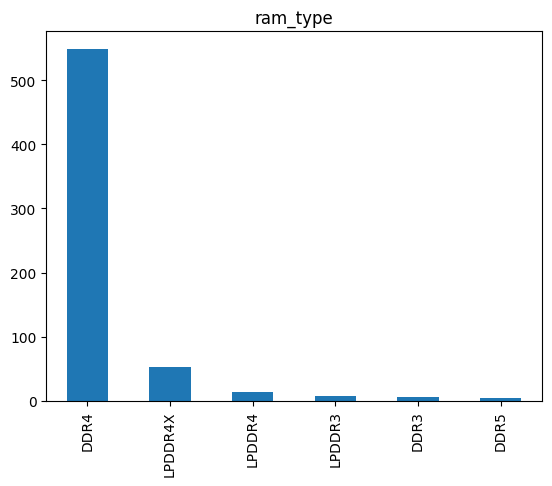

         Number of Sample  Percentage
512 GB                332        52.4
256 GB                142        22.4
0 GB                   83        13.1
1024 GB                74        11.7
128 GB                  3         0.5


<Axes: title={'center': 'ssd'}>

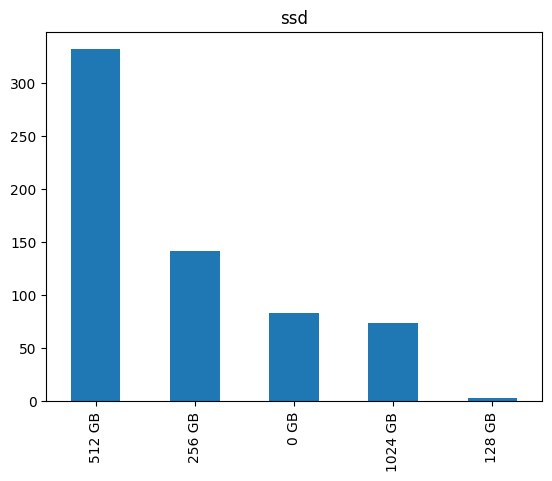

         Number of Sample  Percentage
0 GB                  490        77.3
1024 GB               124        19.6
512 GB                 20         3.2


<Axes: title={'center': 'hdd'}>

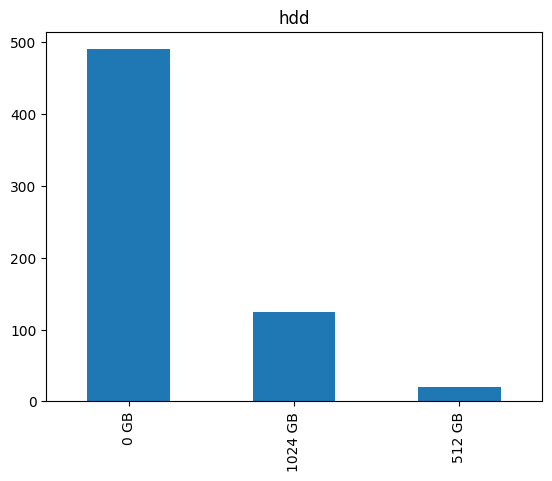

         Number of Sample  Percentage
Windows               621        97.9
DOS                     9         1.4
Mac                     4         0.6


<Axes: title={'center': 'os'}>

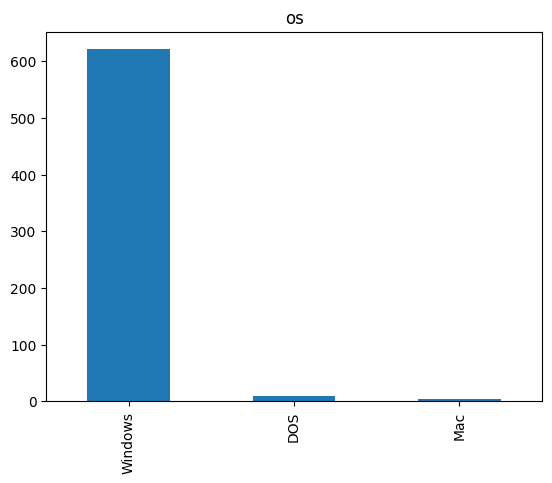

        Number of Sample  Percentage
64-bit               555        87.5
32-bit                79        12.5


<Axes: title={'center': 'os_bit'}>

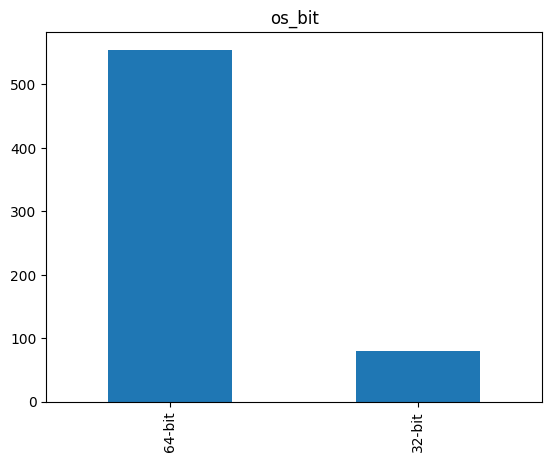

      Number of Sample  Percentage
0 GB               450        71.0
4 GB                95        15.0
2 GB                62         9.8
6 GB                24         3.8
8 GB                 3         0.5


<Axes: title={'center': 'graphic_card_gb'}>

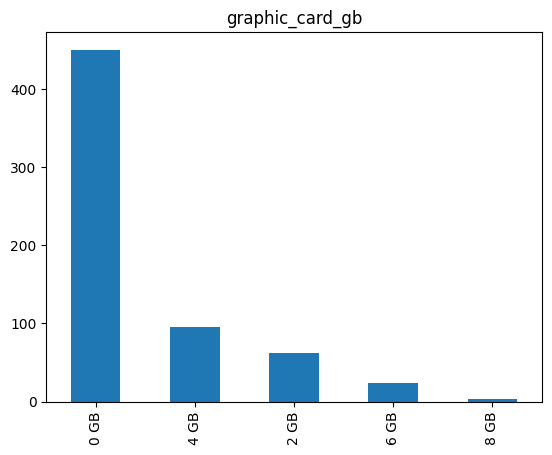

            Number of Sample  Percentage
Casual                   395        62.3
ThinNlight               212        33.4
Gaming                    27         4.3


<Axes: title={'center': 'weight'}>

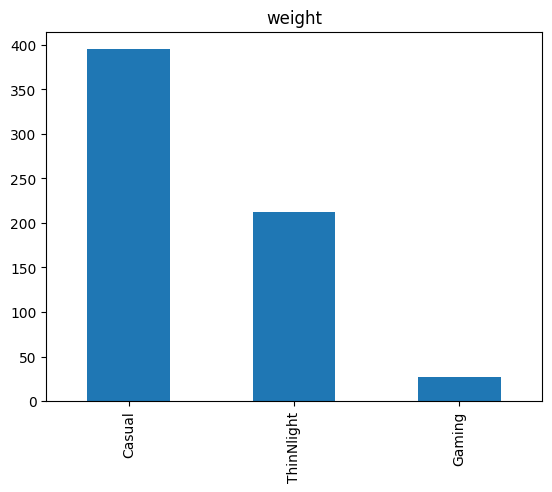

             Number of Sample  Percentage
1 year                    387        61.0
No warranty               226        35.6
2 years                    11         1.7
3 years                    10         1.6


<Axes: title={'center': 'warranty'}>

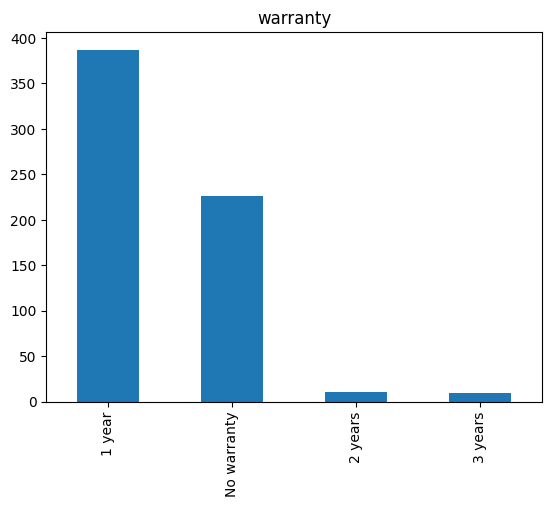

     Number of Sample  Percentage
No                546        86.1
Yes                88        13.9


<Axes: title={'center': 'Touchscreen'}>

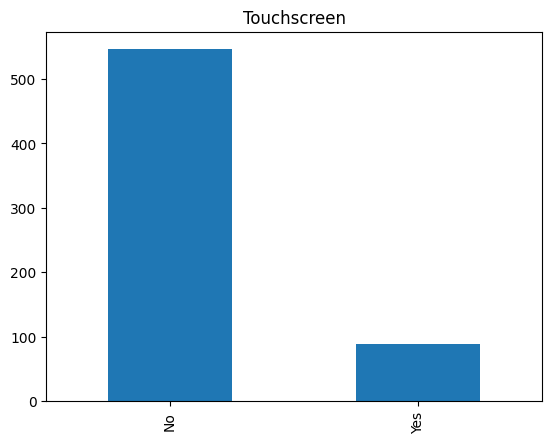

     Number of Sample  Percentage
No                413        65.1
Yes               221        34.9


<Axes: title={'center': 'msoffice'}>

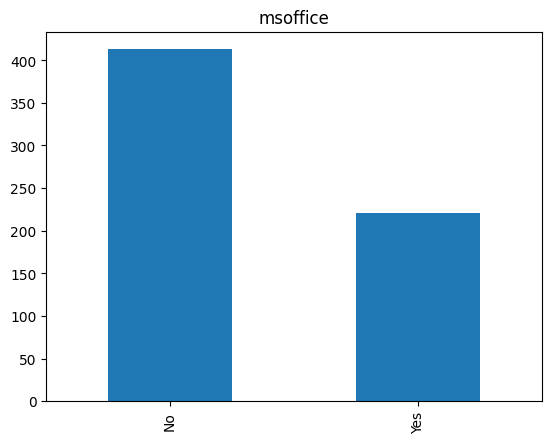

         Number of Sample  Percentage
3 stars               310        48.9
4 stars               300        47.3
5 stars                13         2.1
2 stars                 9         1.4
1 star                  2         0.3


<Axes: title={'center': 'rating'}>

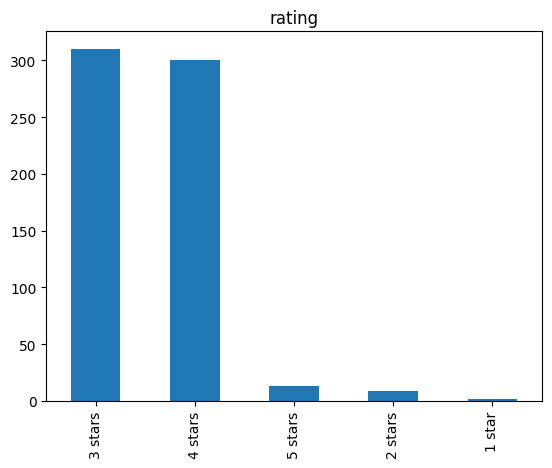

Numerical Feature Graph



array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Number of Ratings'}>],
       [<Axes: title={'center': 'Number of Reviews'}>, <Axes: >]],
      dtype=object)

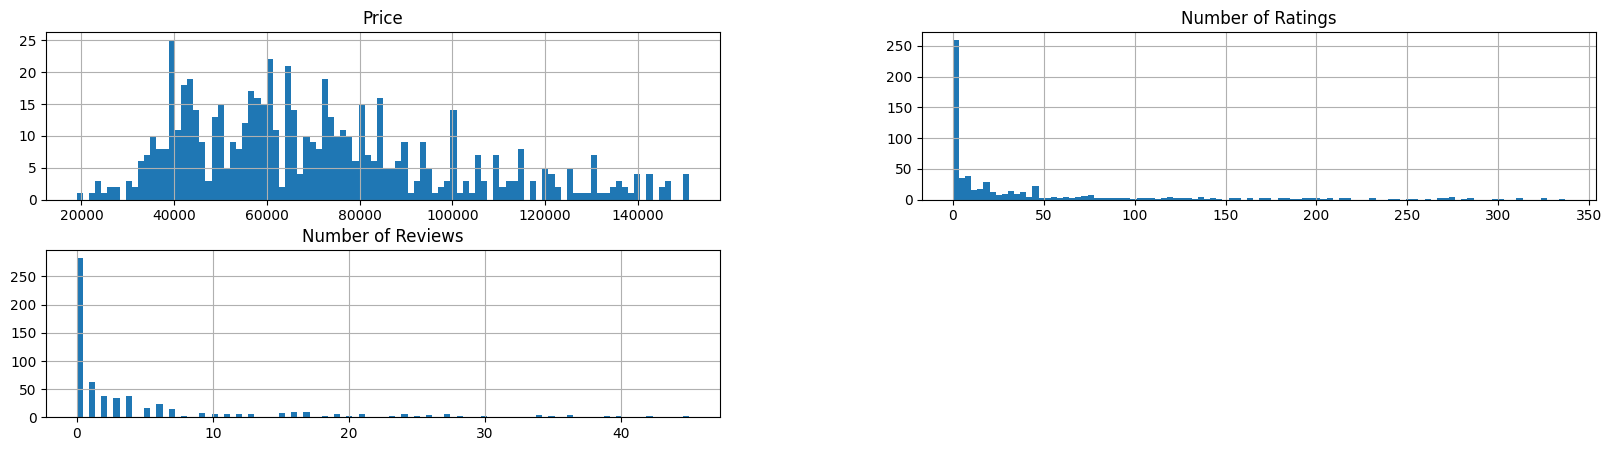

In [7]:
pa.univariate_analysis()



```
Dari matriks korelasi terlihat secara kuantitatif bahwa "Number of Ratings"
dan "Numer of Reviews" hanya sedikit berpengaruh dalam hal ini >-0.5
atau <0.5 dan cenderung mendekati nol (0), sehingga data numerik ini dihilangkan dari data fitur
```



 ____       _____  ____      _              __  __         _  _    _                      _         _              _                   _              _      
| ___|     | ____||  _ \    / \            |  \/  | _   _ | || |_ (_)__   __  __ _  _ __ (_)  __ _ | |_   ___     / \    _ __    __ _ | | _   _  ___ (_) ___ 
|___ \     |  _|  | | | |  / _ \    _____  | |\/| || | | || || __|| |\ \ / / / _` || '__|| | / _` || __| / _ \   / _ \  | '_ \  / _` || || | | |/ __|| |/ __|
 ___) | _  | |___ | |_| | / ___ \  |_____| | |  | || |_| || || |_ | | \ V / | (_| || |   | || (_| || |_ |  __/  / ___ \ | | | || (_| || || |_| |\__ \| |\__ \
|____/ (_) |_____||____/ /_/   \_\         |_|  |_| \__,_||_| \__||_|  \_/   \__,_||_|   |_| \__,_| \__| \___| /_/   \_\|_| |_| \__,_||_| \__, ||___/|_||___/
                                                                                                                                          |___/              


Barplot Analysis


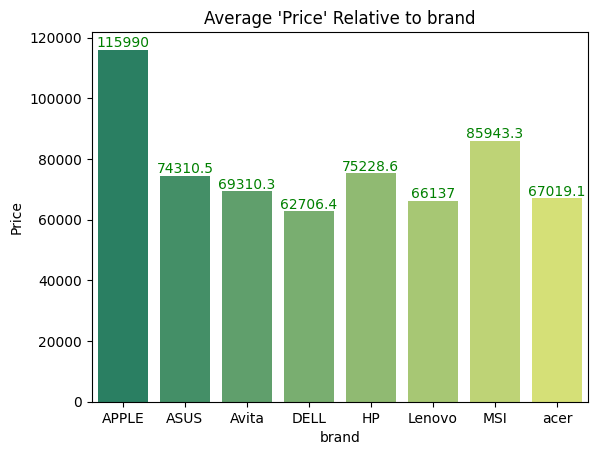

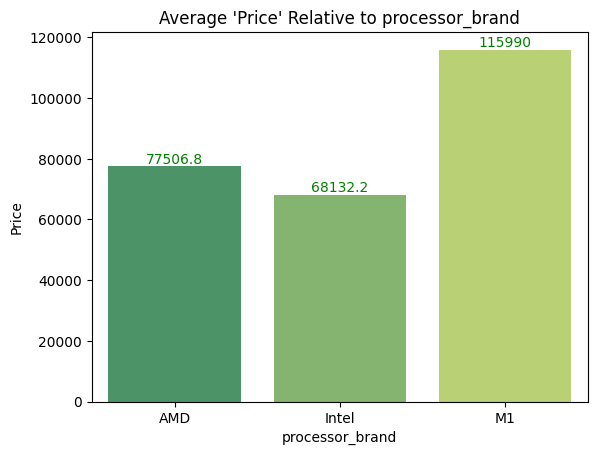

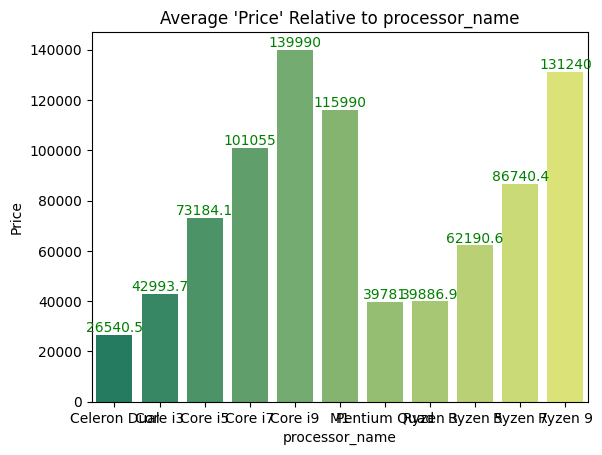

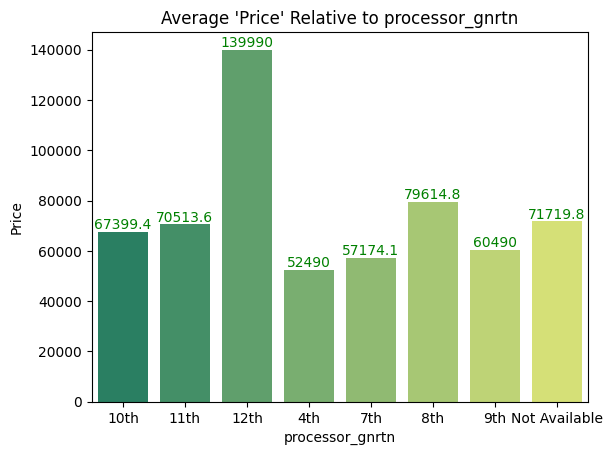

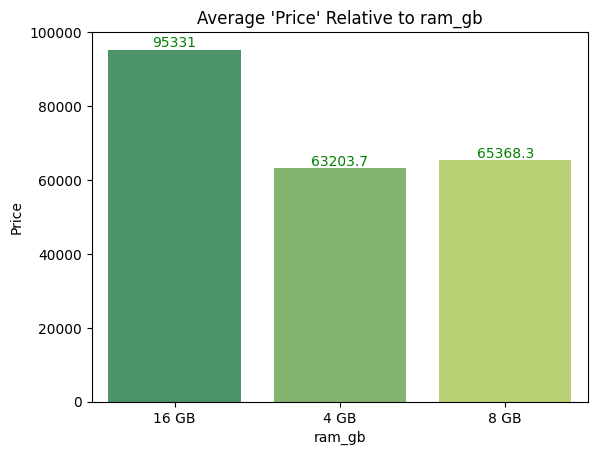

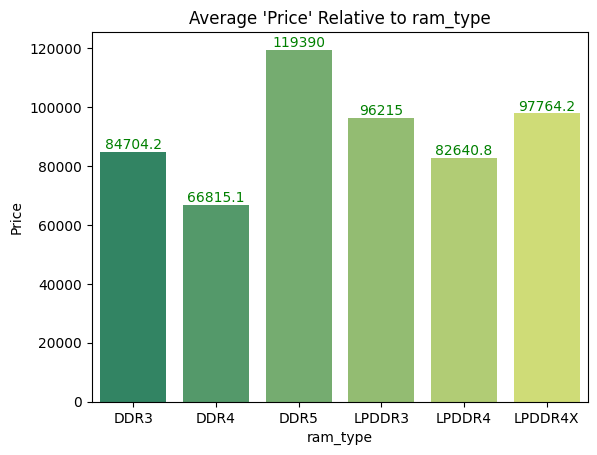

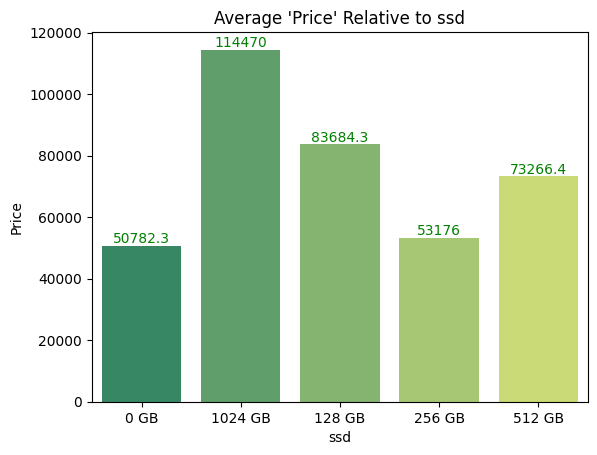

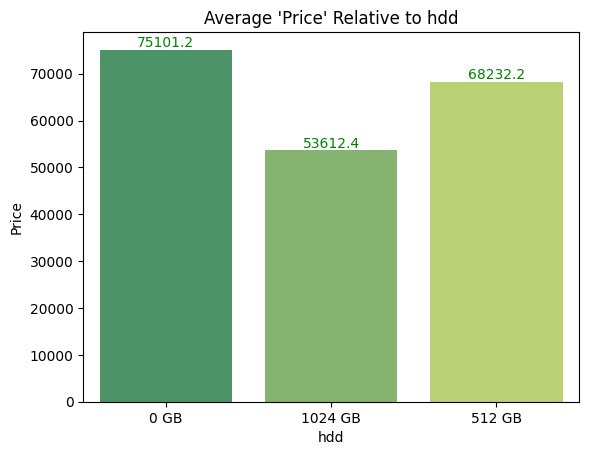

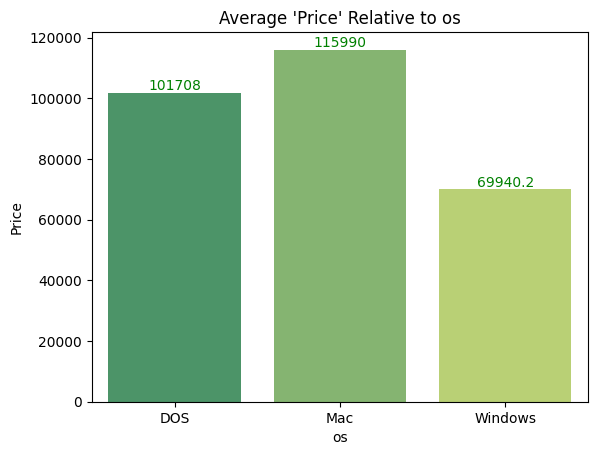

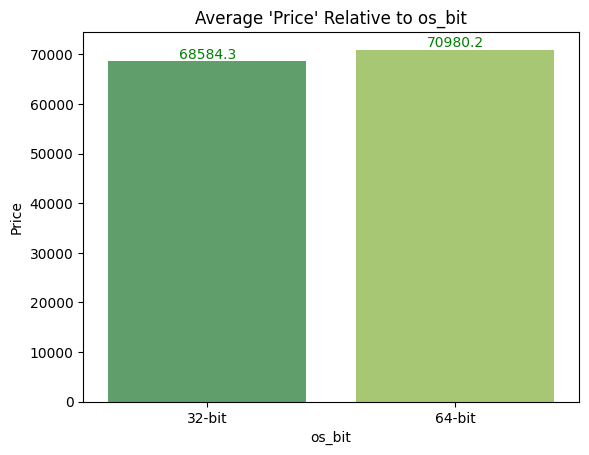

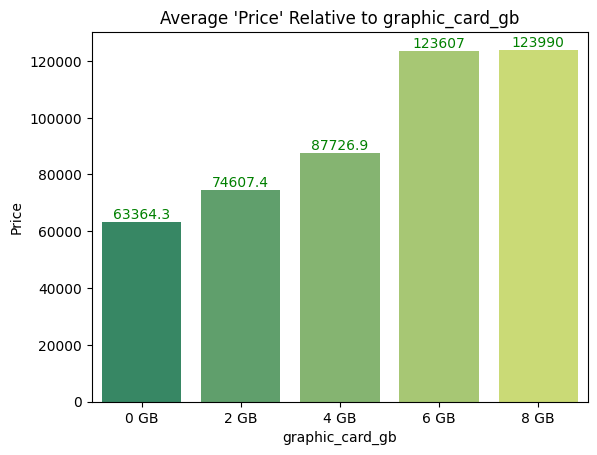

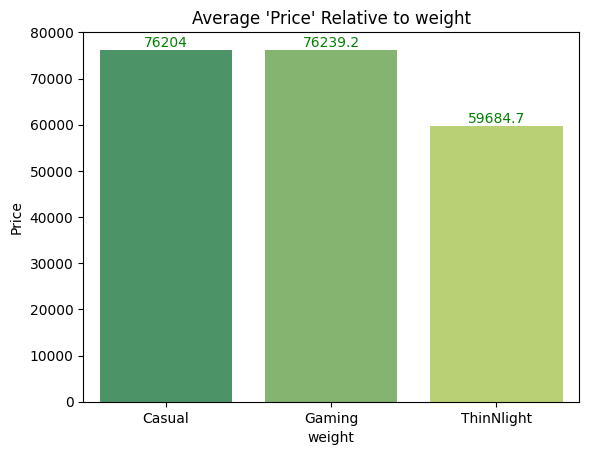

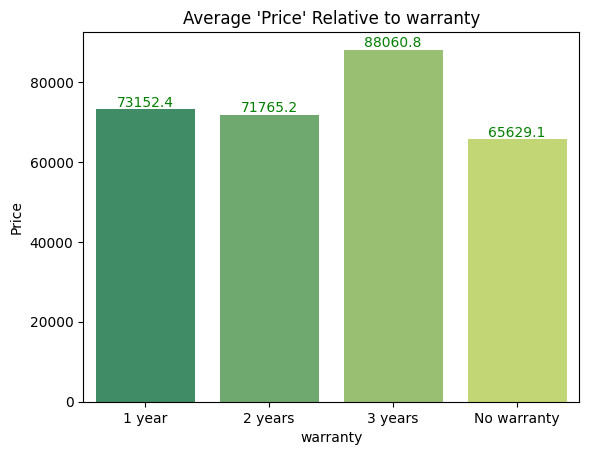

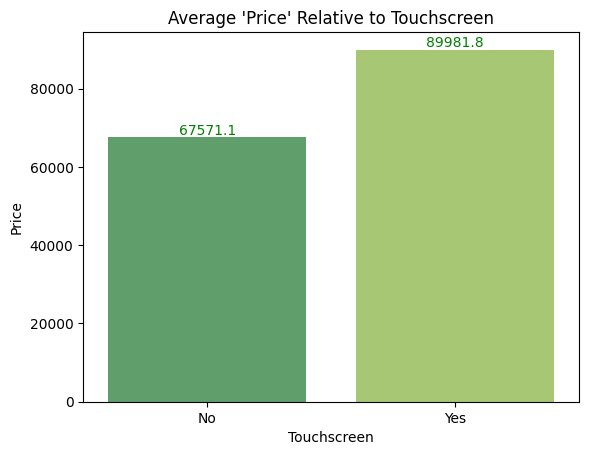

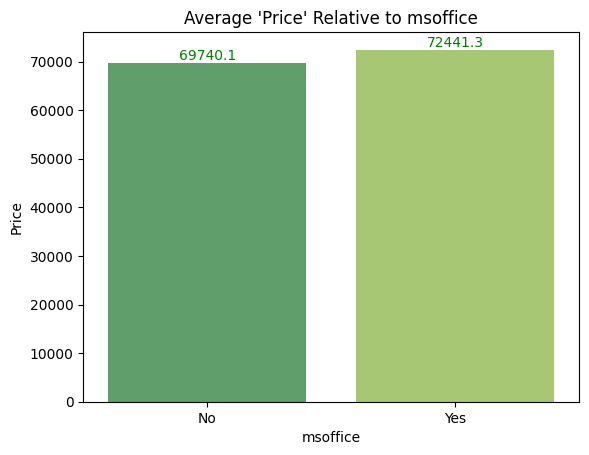

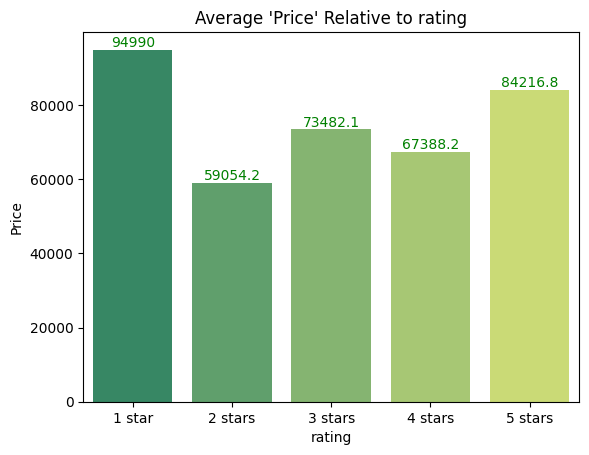

Pairplot Analysis
Heatmap Correlation
Eliminating Small Correlation Data
Data Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            634 non-null    object
 1   processor_brand  634 non-null    object
 2   processor_name   634 non-null    object
 3   processor_gnrtn  634 non-null    object
 4   ram_gb           634 non-null    object
 5   ram_type         634 non-null    object
 6   ssd              634 non-null    object
 7   hdd              634 non-null    object
 8   os               634 non-null    object
 9   os_bit           634 non-null    object
 10  graphic_card_gb  634 non-null    object
 11  weight           634 non-null    object
 12  warranty         634 non-null    object
 13  Touchscreen      634 non-null    object
 14  msoffice         634 non-null    object
 15  Price            634 non-null    int64 
 

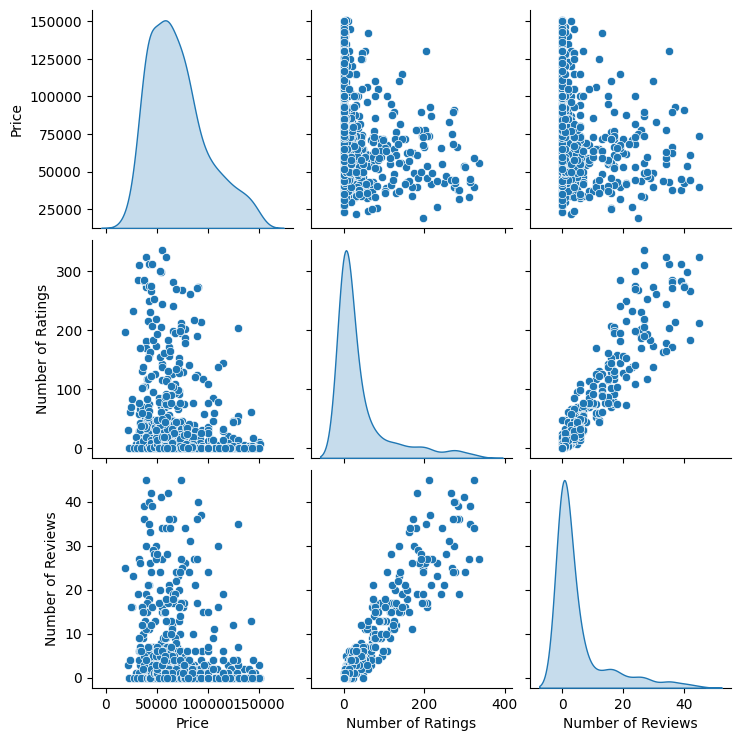

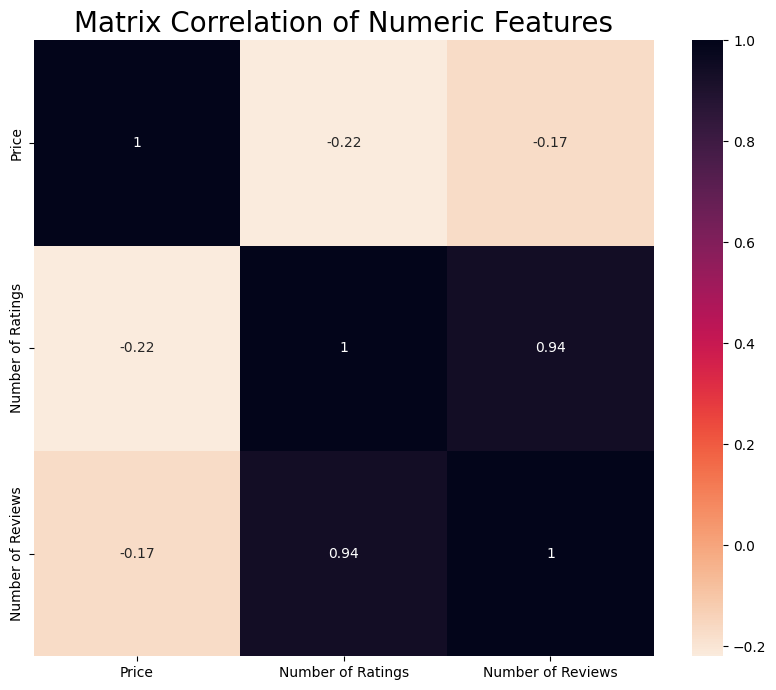

In [8]:
pa.multivariate_analysis()



```
Data kategorikal dilakukan encoding dan data dibagi kedalam data train dan test
dengan perbandingan 4:1
```



In [9]:
pa.data_preparation()

  __        ____          _            ____                                          _    _               
 / /_      |  _ \   __ _ | |_   __ _  |  _ \  _ __   ___  _ __    __ _  _ __   __ _ | |_ (_)  ___   _ __  
| '_ \     | | | | / _` || __| / _` | | |_) || '__| / _ \| '_ \  / _` || '__| / _` || __|| | / _ \ | '_ \ 
| (_) | _  | |_| || (_| || |_ | (_| | |  __/ | |   |  __/| |_) || (_| || |   | (_| || |_ | || (_) || | | |
 \___/ (_) |____/  \__,_| \__| \__,_| |_|    |_|    \___|| .__/  \__,_||_|    \__,_| \__||_| \___/ |_| |_|
                                                         |_|                                              

Encoding Categorical Data : 
['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']

Data Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 822
Data columns (total 74 columns):
 #   Column    


Total Dataset Input  :  634
Total Dataset Output :  634
Total Train Data     :  (507, 73)
Total Test Data      :  (127, 73)




```
Training data dilakukan dengan 5 model untuk mempelajari pola data yaitu KNN,
Random Forest, AdaBoost, GradienBoost, dan SVM. metriks yang digunakan adalah
RMSE dengan hasil akhir Random Forest mempunyai nilai error paling kecil
```



In [10]:
pa.train(conf.models)

 _____      _____               _         _                 ____          _          
|___  |    |_   _| _ __   __ _ (_) _ __  (_) _ __    __ _  |  _ \   __ _ | |_   __ _ 
   / /       | |  | '__| / _` || || '_ \ | || '_ \  / _` | | | | | / _` || __| / _` |
  / /   _    | |  | |   | (_| || || | | || || | | || (_| | | |_| || (_| || |_ | (_| |
 /_/   (_)   |_|  |_|    \__,_||_||_| |_||_||_| |_| \__, | |____/  \__,_| \__| \__,_|
                                                    |___/                            

Train model using  KNN
Train model using  RandomForest
Train model using  AdaBoost
Train model using  GradienBoost
Train model using  SVM
House Price Data




```
Hasil dari evaluasi data setiap model yang telah di latih
```



In [11]:
pa.evaluate(conf.models)

  ___       _____                _                _    _               
 ( _ )     | ____|__   __  __ _ | | _   _   __ _ | |_ (_)  ___   _ __  
 / _ \     |  _|  \ \ / / / _` || || | | | / _` || __|| | / _ \ | '_ \ 
| (_) | _  | |___  \ V / | (_| || || |_| || (_| || |_ | || (_) || | | |
 \___/ (_) |_____|  \_/   \__,_||_| \__,_| \__,_| \__||_| \___/ |_| |_|
                                                                       

y true :  129990
Prediksi KNN :  111558.0
Prediksi RandomForest :  133498.56
Prediksi AdaBoost :  127207.64
Prediksi GradienBoost :  75569.51
Prediksi SVM :  65001.65
